<a href="https://colab.research.google.com/github/ddannybb25/Test/blob/main/n112a_EDA(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 2*

---

# 📝 Assignment

# **🌱 기본 과제**

## **Part 1. EDA**

### **1-1. 데이터 불러오기**

아래의 Tip을 활용하여 Searbon 라이브러리에 내장되어 있는 Titanic 데이터셋을 불러옵니다.

> **💡 Tip**
> - import seaborn as sns
> - df = sns.[load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)("titanic")

In [ ]:
# 이곳에 코드를 작성하세요.
import seaborn as sns
df=sns.load_dataset('titanic')

### **1-2. 데이터 분석**

##### **Q1. 생존자와 사망자 중 평균 나이가 더 높은 그룹을 쓰세요.**

- `Survived` column의 1은 생존자, 0은 사망자를 의미합니다.
- **`.groupby()`**를 사용하여 생존 여부별 평균 나이를 구하세요.

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 이곳에 코드를 작성하세요.

#1은 생존자, 0은 사망자
df.groupby('survived').mean()['age'].reset_index()
#답 사망자

,survived,age
0,0,30.626179
1,1,28.343690


##### **Q2. 사망자 중 남자의 좌석 등급의 중앙값을 쓰세요.**

- **`.groupby()`**와 [`.median()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html)을 사용하여 생존 여부와 성별에 따른 좌석 등급의 중앙값을 구하세요. 
  - 결과는 데이터프레임 형태로 나타내세요. 

In [98]:
# 이곳에 코드를 작성하세요.
df.groupby(['survived','sex'],as_index=False)['pclass'].median()

,survived,sex,pclass
0,0,female,3.0
1,0,male,3.0
2,1,female,2.0
3,1,male,2.0


##### **Q3. `young` 그룹의 사망자의 비율을 반올림하여 소숫점 둘째 자리까지 쓰세요.**

- **`.query()`**를 사용하여 `age` 컬럼의 데이터를 다음 세 그룹으로 나누어 차례대로 변수 `young`, `middle`, `old`에 저장합니다.
  - `young`: 20세 미만 
  - `middle`: 20세 이상 60세 미만
  - `old`: 60세 이상 

- **`.value_counts()`**의 `normalize` 파라미터를 설정하여 각 그룹별 `survived` 데이터 비율을 구하세요. 

In [94]:
# 이곳에 코드를 작성하세요.
young=df.query('age<20')
middle=df.query('age<60')
old=df.query('age>=60')


In [95]:
round(young.survived.value_counts(normalize=True),2)

0    0.52
1    0.48
Name: survived, dtype: float64

In [96]:
round(middle.survived.value_counts(normalize=True),2)

0    0.59
1    0.41
Name: survived, dtype: float64

In [97]:
round(old.survived.value_counts(normalize=True),2)

0    0.73
1    0.27
Name: survived, dtype: float64

### **1-3. 데이터 시각화**

##### **Q4. bar 높이가 가장 높은 대상을 쓰세요.**

- 생존 여부와 성별에 따른 평균 요금을 bar plot으로 나타냅니다. 

In [59]:
survived_fare=df.groupby(['survived','sex'])['fare'].mean()

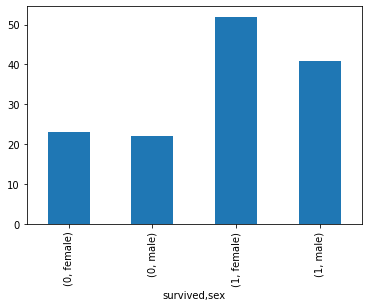

In [60]:
survived_fare.plot(kind='bar');

# **🥇 도전과제**



## **Part 2. 시각화**

### **2-1. Categorical Variable의 시각화**

##### **`survived`의 비율을 확인하세요.**

- Matplotlib의 [`.pie`](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)를 사용하여 `survived` 컬럼의 비율을 시각화해 봅니다.


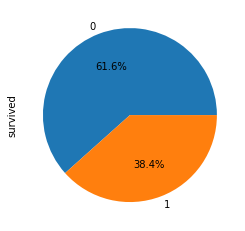

In [69]:
df['survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

##### **pclass의 도수를 확인하세요.**

- Seaborn의 [`.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html)을 사용하여 `pclass` 컬럼의 도수를 시각해 봅니다. 

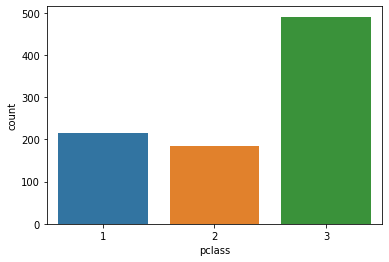

In [ ]:
# 이곳에 코드를 작성하세요.

sns.countplot(x=df['pclass'])
plt.show()

### **2-2. Continuous variables의 시각화**

##### **Age column을 histogram으로 나타내세요.**

- Age column을 histogram으로 나타낼 때, np.arange(0, df.Age.max()+bin_size, bin_size) 에서 bin의 개수가 8이 되도록 bin_size 값을 설정하여 시각화해 보세요.

In [82]:
df.age.max()

80.0

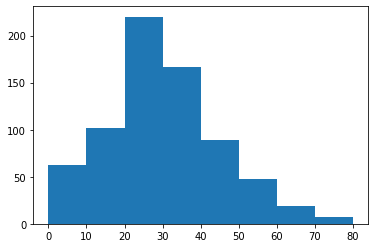

In [89]:
# 이곳에 코드를 작성하세요.
plt.hist(df.age,bins=np.arange(0,85,10))
plt.xticks(np.arange(0,85,10))
plt.show()
